In [3]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from google.colab import drive

# Step 2: Mount Google Drive
drive.mount('/content/drive/')

# Step 3: Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/customer_segmentation_data.csv")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
# Step 4: Data Preprocessing
# Display initial data info
print("Initial Data Info:")
print(df.info())

Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1000 non-null   int64  
 1   age                   1000 non-null   int64  
 2   gender                1000 non-null   object 
 3   income                1000 non-null   int64  
 4   spending_score        1000 non-null   int64  
 5   membership_years      1000 non-null   int64  
 6   purchase_frequency    1000 non-null   int64  
 7   preferred_category    1000 non-null   object 
 8   last_purchase_amount  1000 non-null   float64
dtypes: float64(1), int64(6), object(2)
memory usage: 70.4+ KB
None


In [5]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

# Fill missing values if any (for simplicity, using mean for numeric and mode for categorical)
df['age'].fillna(df['age'].mean(), inplace=True)
df['income'].fillna(df['income'].mean(), inplace=True)
df['spending_score'].fillna(df['spending_score'].mean(), inplace=True)
df['membership_years'].fillna(df['membership_years'].mean(), inplace=True)
df['purchase_frequency'].fillna(df['purchase_frequency'].mean(), inplace=True)
df['preferred_category'].fillna(df['preferred_category'].mode()[0], inplace=True)
df['last_purchase_amount'].fillna(df['last_purchase_amount'].mean(), inplace=True)

# Encode categorical variables
label_encoder = LabelEncoder()
df['preferred_category'] = label_encoder.fit_transform(df['preferred_category'])

# Scale numerical features
scaler = StandardScaler()
numerical_features = ['age', 'income', 'spending_score', 'membership_years', 'purchase_frequency', 'last_purchase_amount']
df[numerical_features] = scaler.fit_transform(df[numerical_features])


Missing Values:
id                      0
age                     0
gender                  0
income                  0
spending_score          0
membership_years        0
purchase_frequency      0
preferred_category      0
last_purchase_amount    0
dtype: int64


<ipython-input-5-d754d61be46f>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(), inplace=True)
<ipython-input-5-d754d61be46f>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

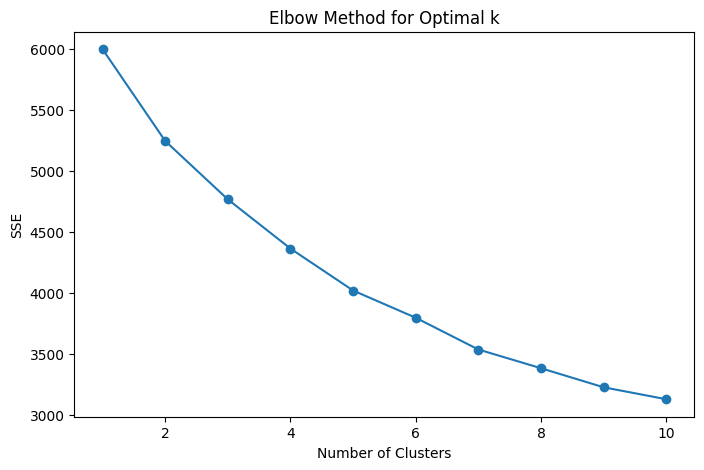

In [6]:
# Step 5: Clustering
# K-means Clustering
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[numerical_features])
    sse.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal k')
plt.show()

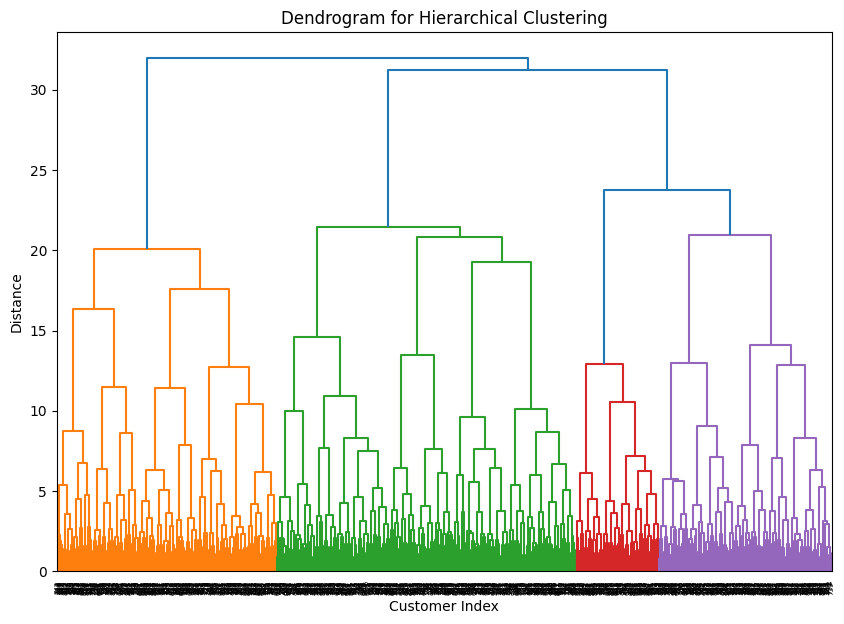

In [7]:
# Fit K-means with optimal k (assuming optimal k is determined to be 3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[numerical_features])

# Hierarchical Clustering
linked = linkage(df[numerical_features], method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Customer Index')
plt.ylabel('Distance')
plt.show()

Cluster Summary:
               age    income  spending_score  membership_years  \
Cluster                                                         
0        0.200789 -0.986034        0.002479          0.107128   
1       -0.179212  0.247757       -0.088927         -0.117305   
2        0.014433  0.847372        0.126105          0.039198   

         purchase_frequency  last_purchase_amount  
Cluster                                            
0                 -0.008325              0.490962  
1                 -0.165276             -0.960610  
2                  0.250208              0.793937  


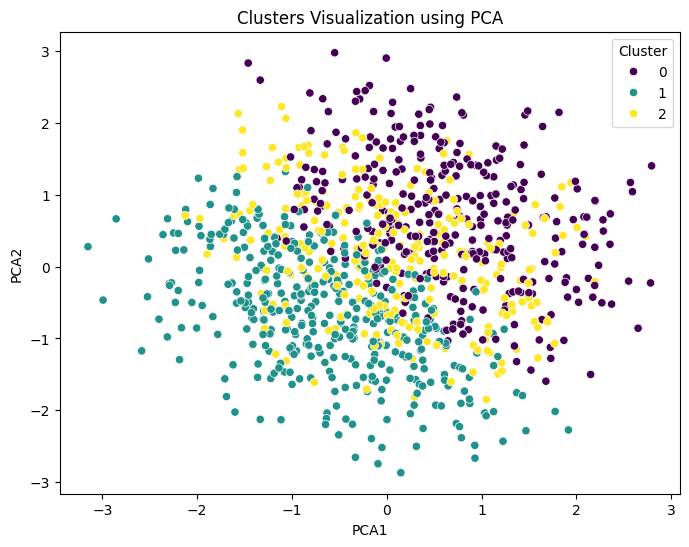

In [8]:
# Step 6: Cluster Analysis
cluster_summary = df.groupby('Cluster')[numerical_features].mean()
print("Cluster Summary:\n", cluster_summary)

# Visualizing Clusters
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df[numerical_features])
df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='viridis')
plt.title('Clusters Visualization using PCA')
plt.show()

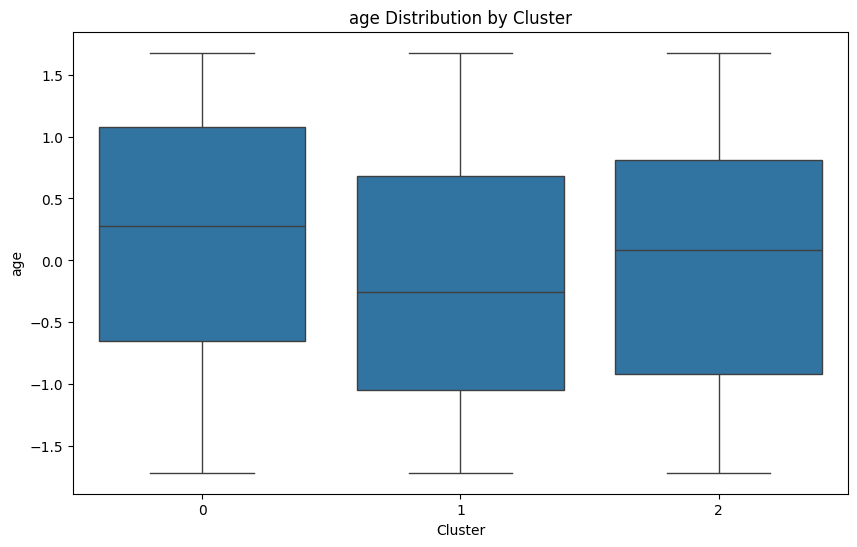

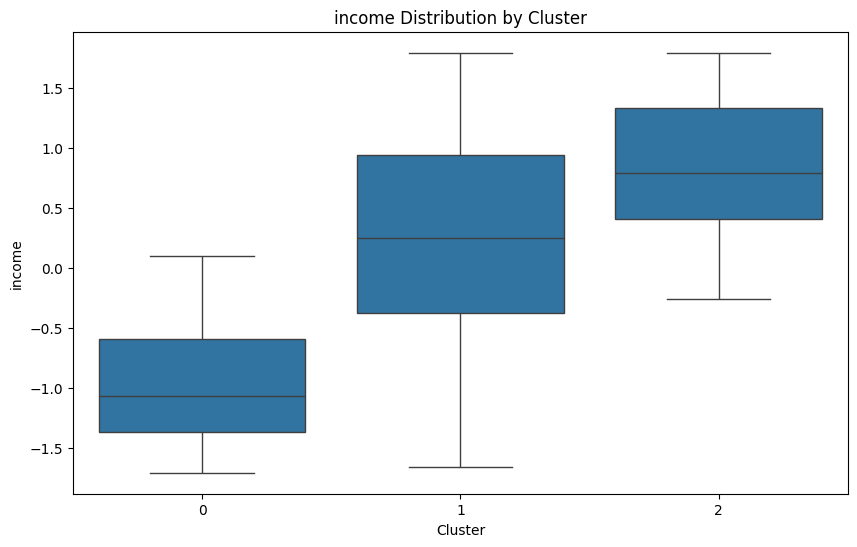

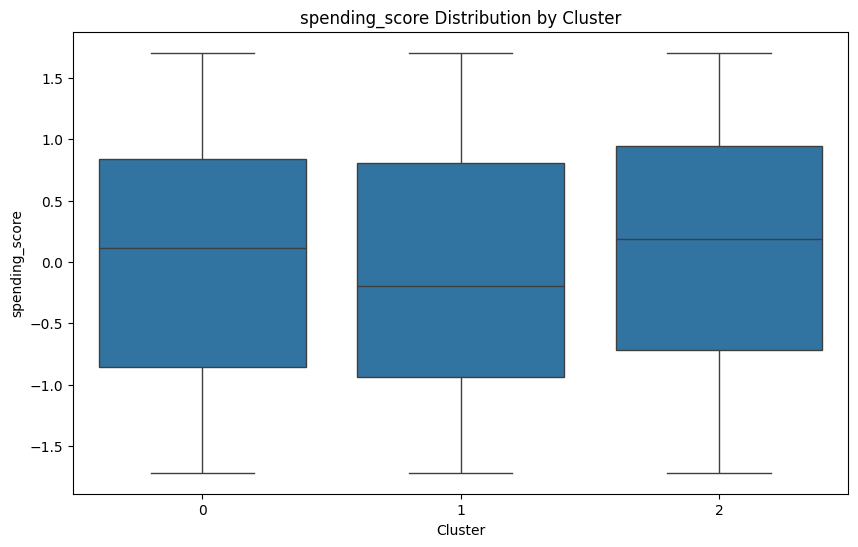

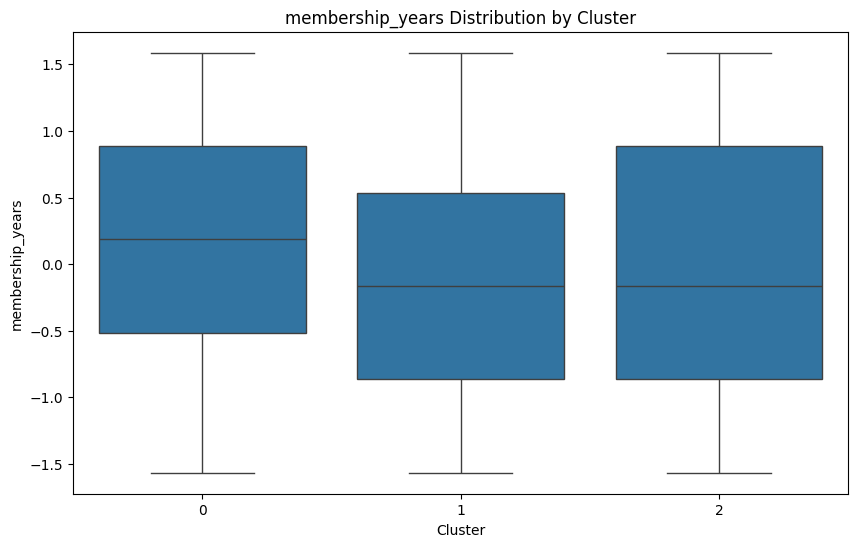

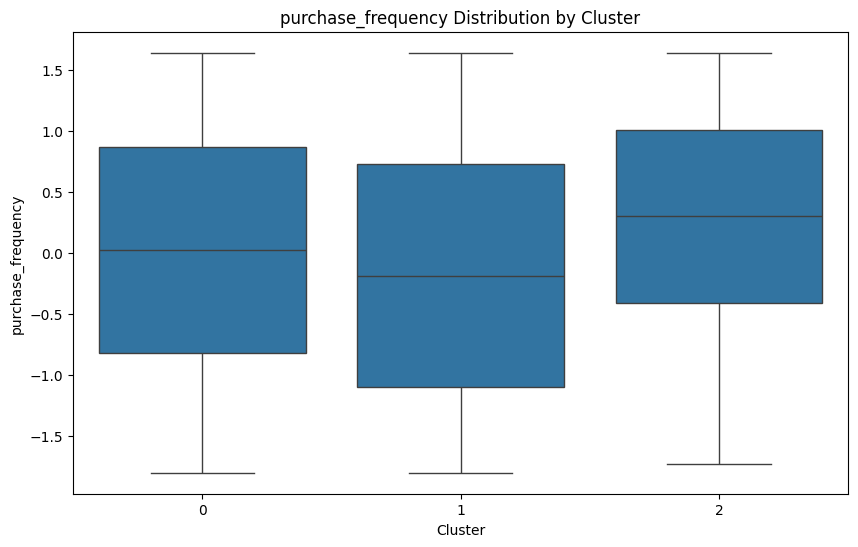

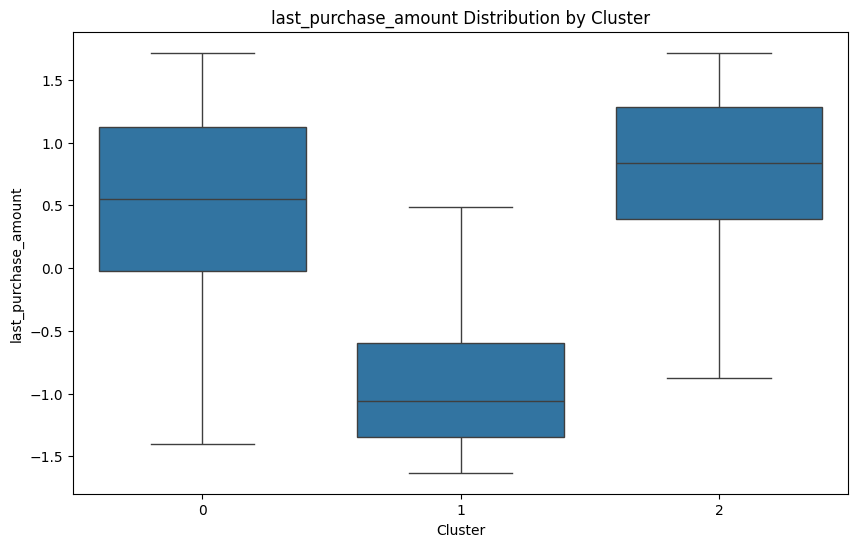

In [9]:
# Additional visualizations for clusters
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=feature, data=df)
    plt.title(f'{feature} Distribution by Cluster')
    plt.show()